In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [112]:
df = pd.read_csv('expenses.csv')

# Date is of format: 2024-04-13T00:00:00+00:00
# df['transaction_date'] = pd.to_datetime(df['transaction_date'])
# df['transaction_date'] = df['transaction_date'].dt.date
df

,transaction_id,Amount,Category,description,transaction_date,Unnamed: 5
0,1,11.11,Shopping,Amazon,2018-01-01T00:00:00+00:00,NaN
1,2,1247.44,Mortgage & Rent,Mortgage Payment,2018-01-02T00:00:00+00:00,NaN
2,3,24.22,Restaurants,Thai Restaurant,2018-01-02T00:00:00+00:00,NaN
3,4,2298.09,Credit Card Payment,Credit Card Payment,2018-01-03T00:00:00+00:00,NaN
4,5,11.76,Movies & DVDs,Netflix,2018-01-04T00:00:00+00:00,NaN
...,...,...,...,...,...,...
549,550,25.76,Groceries,Grocery Store,2019-10-25T00:00:00+00:00,NaN
550,551,9.76,Restaurants,Tiny Deli,2019-10-26T00:00:00+00:00,NaN
551,552,35.70,Groceries,Grocery Store,2019-10-26T00:00:00+00:00,NaN
552,553,39.42,Restaurants,Pizza Place,2019-10-26T00:00:00+00:00,NaN


Category
Paycheck               102000.00
Credit Card Payment     11327.49
Mortgage & Rent          6237.20
Restaurants              4506.29
Groceries                2822.36
Name: Amount, dtype: float64


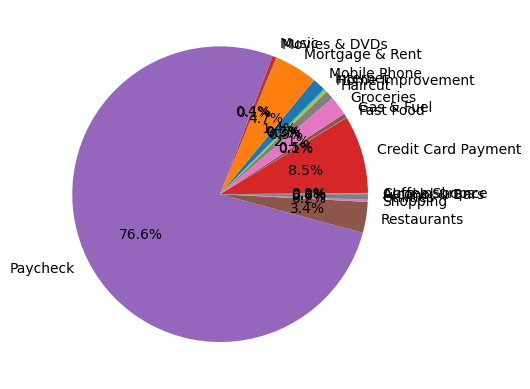

In [113]:
# Visualize the categories vs money spent in pie chart
category_money = df.groupby('Category')['Amount'].sum()
print(category_money.nlargest(5))
fig, ax = plt.subplots()
ax.pie(category_money, labels=category_money.index, autopct='%1.1f%%')
plt.show()

In [114]:
# Visualize the merchant vs the amount spent in chart
merchant_money = df.groupby('merchant')['Amount'].sum()

# Print top 5 merchant with the highest amount spent
print(merchant_money.nlargest(5))

fig, ax = plt.subplots()
ax.bar(merchant_money.nlargest(5).index, merchant_money.nlargest(5))
ax.xaxis.set_tick_params(rotation=45)
plt.show()

KeyError: 'merchant'

### Data Preprocessing

1. Find the anomalies in the data using sklearn isolation forest. 
2. Firstly group the data by (category and amount) and (merchant and amount) separately and then apply IsolationForest to the data

In [115]:
# Sort the transaction by category with same category together
category_df = df.sort_values(by='Category')
category_df.to_csv('category_sorted.csv', index=False)

In [116]:
# Group the entries category-wise with amount
grouped_data = df.groupby('Category')['Amount'].apply(list).reset_index()

# Apply IsolationForest to each category separately
for index, row in grouped_data.iterrows():
    category = row['Category']
    amounts = row['Amount']

    # Reshape amounts for IsolationForest input
    X = np.array(amounts).reshape(-1, 1)
    
    # Fit IsolationForest model
    clf = IsolationForest(max_samples='auto', random_state=0)
    clf.fit(X)
    
    # Predict outliers
    y_pred = clf.predict(X)
    
    # Filter outliers
    outliers = X[y_pred == -1]
    
    # Print outliers for each category
    print(f"Category: {category}")
    print("Outliers:")
    print(outliers)
    print()

Category: Alcohol & Bars
Outliers:
[[14. ]
 [19.5]]

Category: Auto Insurance
Outliers:
[]

Category: Coffee Shops
Outliers:
[[2.]
 [4.]
 [7.]
 [7.]
 [7.]]

Category: Credit Card Payment
Outliers:
[[2298.09]
 [ 145.14]
 [ 817.14]
 [ 817.14]]

Category: Fast Food
Outliers:
[]

Category: Gas & Fuel
Outliers:
[[ 4.58]
 [12.34]
 [15.92]
 [47.5 ]
 [18.39]
 [42.89]
 [12.34]
 [ 4.58]
 [12.34]]

Category: Groceries
Outliers:
[[43.54]
 [44.19]
 [27.79]
 [35.95]
 [32.07]
 [10.69]
 [ 5.09]
 [19.35]
 [11.76]
 [16.06]
 [ 9.09]
 [80.79]
 [82.36]
 [ 6.48]
 [ 4.32]
 [27.92]
 [11.39]
 [13.25]
 [ 2.5 ]
 [ 7.5 ]
 [28.64]
 [ 3.98]
 [ 4.96]]

Category: Haircut
Outliers:
[]

Category: Home Improvement
Outliers:
[[ 42.7]
 [224.7]]

Category: Internet
Outliers:
[[69.99]]

Category: Mobile Phone
Outliers:
[[89.46]]

Category: Mortgage & Rent
Outliers:
[]

Category: Movies & DVDs
Outliers:
[[6.41]]

Category: Music
Outliers:
[[10.49]]

Category: Paycheck
Outliers:
[]

Category: Restaurants
Outliers:
[[ 25.85]
 

IndexError: index 2 is out of bounds for axis 0 with size 2

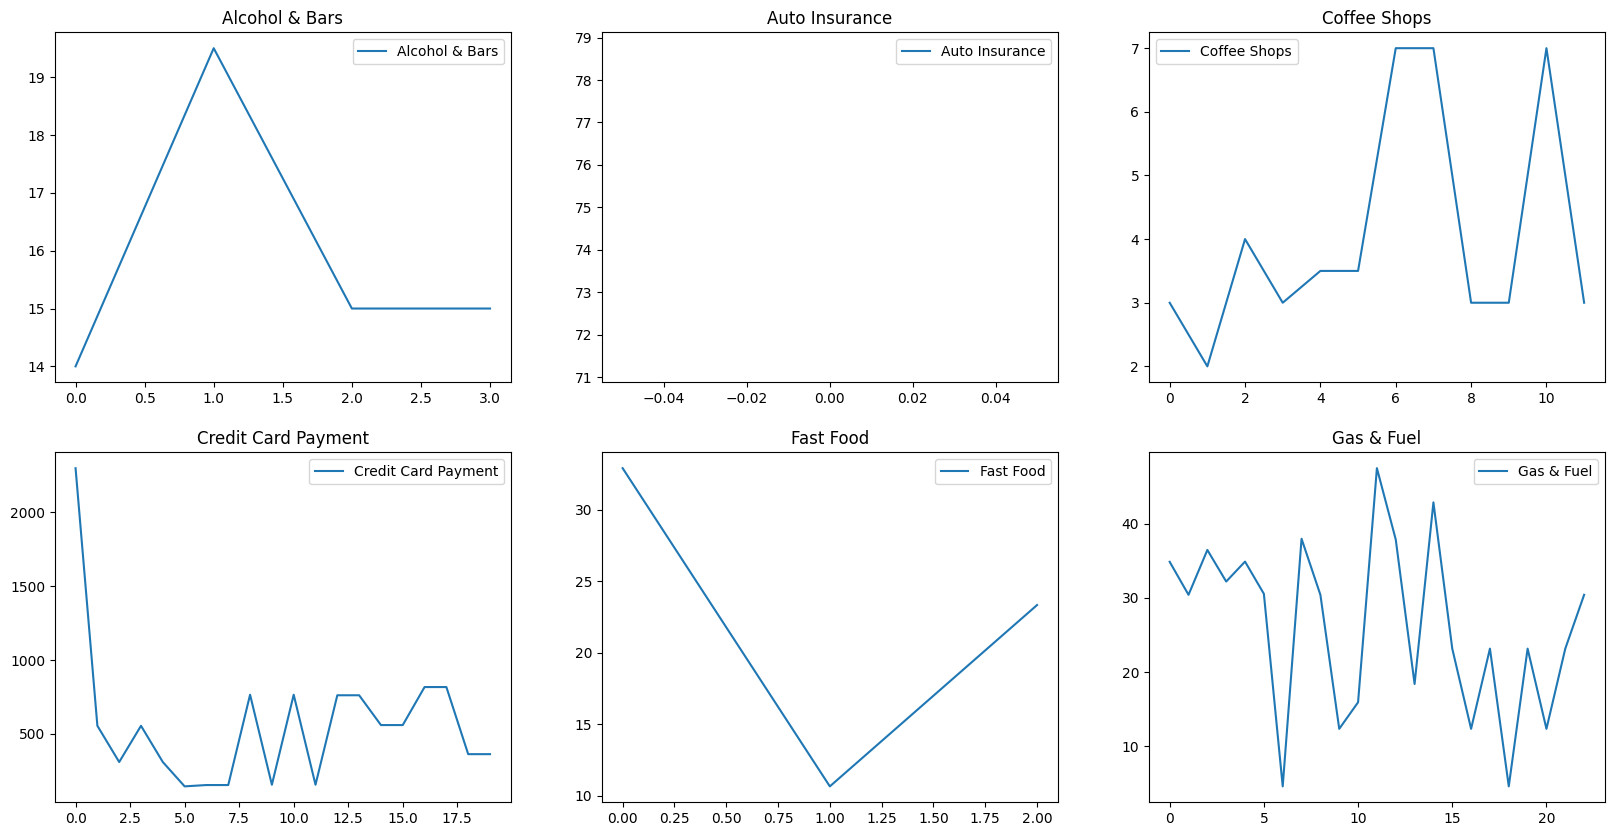

In [117]:
# Plot a separate line chart (2x3) of each category with different colors and amount in each category
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for index, row in grouped_data.iterrows():
    category = row['Category']
    amounts = row['Amount']
    ax[index // 3, index % 3].plot(amounts, label=category)
    ax[index // 3, index % 3].set_title(category)
    ax[index // 3, index % 3].legend()
plt.show()